# Purpose of this simulation


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tables
import aopy
import sklearn
from weights import *
from weights_linear_regression import calc_R2_with_sim_C
# so that we write in latex
from matplotlib import rc
import matplotlib.font_manager  # for ubuntu

from afs_plotting import subplots_with_labels

rc('font', **{'family': 'sans-serif', 'sans-serif': ['Arial']})
rc('text', usetex=False)

np.set_printoptions(precision=5, suppress=True)
sns.set_context('paper')

save_to_gdrive = False # this is done through the gdrive's mapping to the local file system
gdrive_directory = '/home/aolab/gdrive/Projects/Feature Selection/Figures/'
dpi_value = 300

# ideas

In [30]:
# this is for creating exp_conditions that scan the difference across the files
#for comparision
#data_dump_folder = '/home/sijia-aw/BMi3D_my/operation_funny_chicken/sim_data/more_neurons/run_3/'
# data_dump_folder = \
# 'D:/sim_data/gaussian_peaks/2022_02_02_gaussian_peaks/'

ROUND_DECIMALS = 3


data_dump_folder = \
'/home/aolab/sijia/data/figure6_total_number_of_neurons/'
random_seed = 0
n_neurons = 128
# 
mean_first_peak = 50
mean_second_peak = 100
std = 3
ENCODER_CHANGE_MODE = "same"

# clda setup 
rho = 0.5
batchlen = 100

# noises = np.arange(9)
# noises = np.exp2(noises)
noises = [32]
noise = 32

smoothness_coef = 0.1
num_of_lags = 3#  this is the K in the formulation, the number of batch updated feature scores we expect it to be.
past_batch_decay_factor = 0.2


exp_conds = []

sparsity_array = [0.06]
smoothness_array = [0.1] # this is different from the start out from the full feature set

sparsity_array = np.round(sparsity_array, ROUND_DECIMALS)
smoothness_array = np.round(smoothness_array, ROUND_DECIMALS)

num_of_features_array  = [32]   # specify how many features we want to use, or None
#TODO: add 32 to that number of features array

total_number_of_neurons_array = [32, 64, 128, 256, 512, 1024]
total_number_of_neurons_array = np.array(total_number_of_neurons_array)

for total_number_of_neurons in total_number_of_neurons_array:
    for sparsity_val in sparsity_array:
        for smoothness_val in smoothness_array:
            for num_of_features in num_of_features_array:
                exp_conds_add = [f'joint_convex_{1.0}_{random_seed}_noise_{noise}_{total_number_of_neurons}_{mean_second_peak}_{std}_clda_rho_{rho}_batchlen_{batchlen}_sparsity_{sparsity_val}_smooth_{smoothness_val}_lags_{num_of_lags}_decay_{past_batch_decay_factor}_num_feats_{num_of_features}_{ENCODER_CHANGE_MODE}' ]
                exp_conds.extend(exp_conds_add)
        #exp_conds.extend(exp_conds_keep)

feature_selection_schemes = ['w/o feature selection', 'convex', 'subset throughout']

NUM_SPARSITY, NUM_SMOOTH = len(sparsity_array), len(smoothness_array)

print("the folder at which data is located:")
print(data_dump_folder)
print(f"we have {len(exp_conds)}" , f"num of sparsity vals {NUM_SPARSITY}", f'num of smoothness vals {NUM_SMOOTH}')


for e in exp_conds: print(e)


the folder at which data is located:
/home/aolab/sijia/data/figure6_total_number_of_neurons/
we have 6 num of sparsity vals 1 num of smoothness vals 1
joint_convex_1.0_0_noise_32_32_100_3_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.1_lags_3_decay_0.2_num_feats_32_same
joint_convex_1.0_0_noise_32_64_100_3_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.1_lags_3_decay_0.2_num_feats_32_same
joint_convex_1.0_0_noise_32_128_100_3_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.1_lags_3_decay_0.2_num_feats_32_same
joint_convex_1.0_0_noise_32_256_100_3_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.1_lags_3_decay_0.2_num_feats_32_same
joint_convex_1.0_0_noise_32_512_100_3_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.1_lags_3_decay_0.2_num_feats_32_same
joint_convex_1.0_0_noise_32_1024_100_3_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.1_lags_3_decay_0.2_num_feats_32_same


In [31]:

from afs_files import load_feature_selection_files
(exp_data_all, exp_metadata_all) = load_feature_selection_files(data_dump_folder, exp_conds)
print(f'we collected {len(exp_data_all)} number of experiments')

/home/aolab/sijia/analyze/aopy/preproc/bmi3d.py:382: UserWarning: Warning: no sync clock connected! This will usually result in problems.
  warnings.warn("Warning: no sync clock connected! This will usually result in problems.")
/home/aolab/sijia/analyze/aopy/preproc/bmi3d.py:449: UserWarning: No sync events present, using bmi3d events instead
  warnings.warn("No sync events present, using bmi3d events instead")


we collected 6 number of experiments


# Check feature selection strategies

## check feature weights 

Text(0.5, 1.0, 'Feature distribution std 3 Hz')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

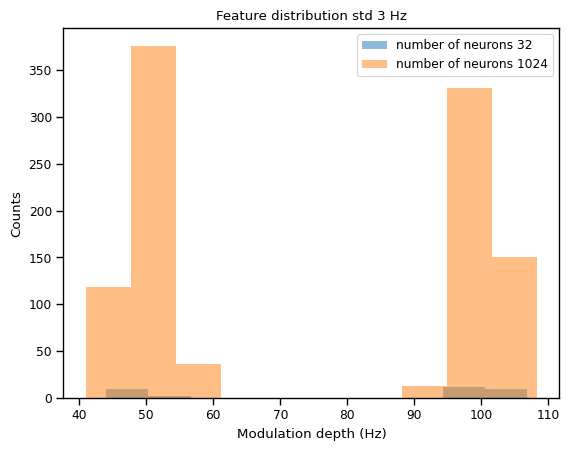

In [32]:

# plot the histogram of the feature weights

fig_weight, ax_weight = plt.subplots()

exp_indices = [0, -1]

for exp_index in exp_indices:
    feature_weights = exp_data_all[exp_index]['feature_selection']['feature_weights']
    ax_weight.hist(feature_weights, label=f'number of neurons {total_number_of_neurons_array[exp_index]}', alpha=0.5)
    ax_weight.legend()
ax_weight.set_xlabel('Modulation depth (Hz)')
ax_weight.set_ylabel('Counts')
ax_weight.set_title(f'Feature distribution std {std} Hz')

## check between conditions

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

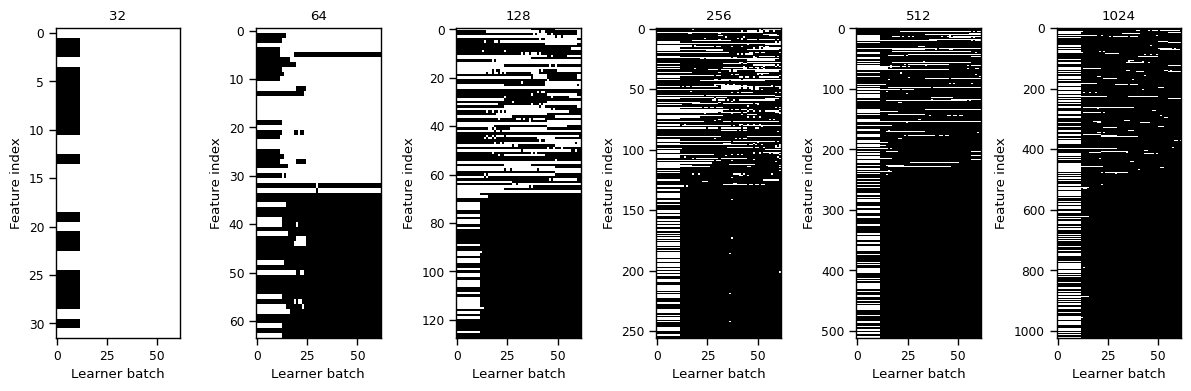

In [33]:
import importlib 
from afs_plotting import plot_feature_selection

num_columns = len(total_number_of_neurons_array)

fig_feat_activity, ax_feat_activity = plt.subplots(1, num_columns,
                                                   figsize = (12, 4))



for i, (e, a, s) in enumerate(zip(exp_data_all,  ax_feat_activity, total_number_of_neurons_array)):
    plot_feature_selection(e['feature_selection']['feat_set'], ax = a)
    
    #only title the exp if there are three exp, right. 
    a.set_title(np.round(s, decimals = ROUND_DECIMALS))

fig_feat_activity.tight_layout()


In [34]:
# next question I ask,  how many features are being selected, anyway? 
num_features_exp_by_batch = []
selected_feature_batches = [exp_data_all[i]['feature_selection']['feat_set'] for i in range(len(exp_data_all))]
for i,e in enumerate(exp_data_all):

    active_set = e['feature_selection']['feat_set']

    num_features_over_batch = np.sum(active_set, axis = 1)
    num_features_exp_by_batch.append(num_features_over_batch.copy())

# num_features_exp_by_batch = np.array(num_features_exp_by_batch)
# selected_feature_batches = np.array(selected_feature_batches)

In [35]:
for s in selected_feature_batches:
    print(s.shape)


smoothness_conds_by_batch = \
[calculate_feature_smoothness(s.T, mode = "incremental") for s in selected_feature_batches]

smoothness_conds_by_batch = np.array(smoothness_conds_by_batch)
print(smoothness_conds_by_batch.shape)

(62, 32)
(62, 64)
(62, 128)
(62, 256)
(62, 512)
(62, 1024)
(6, 61)


In [36]:
# smooth the smoothness_conds_by_batch
window_size = 10
weights = np.ones(window_size) / window_size
smoothness_conds_by_batch_ma = np.apply_along_axis(lambda x: np.convolve(x, weights, mode='valid'), 
                                                   axis=1,
                                                   arr=smoothness_conds_by_batch)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

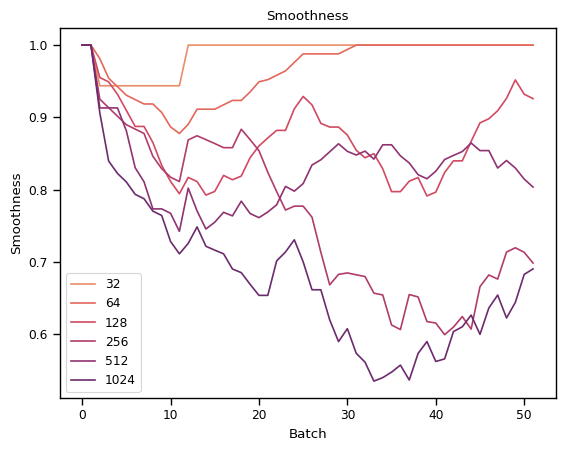

In [37]:
# make a figure that plots the smoothness

fig_smoothness, ax_smoothness = plt.subplots()
colors = sns.palettes.color_palette('flare', n_colors = len(total_number_of_neurons_array))

for i, (s, c) in enumerate(zip(smoothness_conds_by_batch_ma, colors)):
    ax_smoothness.plot(s, color = c, label = total_number_of_neurons_array[i])
    ax_smoothness.set_xlabel('Batch')
    ax_smoothness.set_ylabel('Smoothness')
    ax_smoothness.legend()
    ax_smoothness.set_title('Smoothness')

# ax_smoothness.set_ylim([0.5, 1])

In [38]:
# next question I ask,  how many features are being selected, anyway? 
num_features_exp_by_batch = []

for i,e in enumerate(exp_data_all):

    active_set = e['feature_selection']['feat_set']

    num_features_over_batch = np.sum(active_set, axis = 1)
    num_features_exp_by_batch.append(num_features_over_batch.copy())

num_features_exp_by_batch = np.array(num_features_exp_by_batch)


# Behaviour comparision

## count how many rewards

In [39]:
fps = 60

reward_rate_all = list()
window_time_stamps_all = list()
NUM_EXP = len(exp_data_all)

total_rewards_all = list()

for i in range(NUM_EXP):

    time_stamps = exp_data_all[i]['events']['time'] / fps
    events = exp_data_all[i]['events']['event']
    
    num_rewards = np.count_nonzero(events == b'REWARD')

    (reward_rate, window_time_stamps) = aopy.analysis.calc_running_event_rate(b'REWARD', events, time_stamps, 
                                                                window_size= 120,
                                                                 window_step= 30)
    reward_rate_all.append(reward_rate)
    window_time_stamps_all.append(window_time_stamps)
    total_rewards_all.append(num_rewards)


window_stamps_all = np.array(window_time_stamps_all)
reward_rate_all = np.array(reward_rate_all) 
reward_rate_all = reward_rate_all.reshape((NUM_EXP,-1))
window_stamps_all = window_stamps_all.reshape((NUM_EXP,-1))

total_rewards_all = np.array(total_rewards_all)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

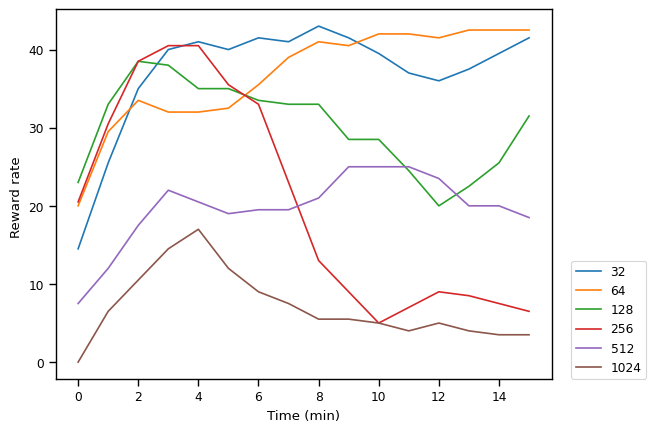

In [40]:
colors = ['blue', 'orange', 'red']

plt.plot(reward_rate_all.T)
plt.xlabel('Time (min)')
plt.ylabel('Reward rate ')
plt.legend(np.round(total_number_of_neurons_array,ROUND_DECIMALS), loc=(1.04,0))


# Summary Figure for Figure 4

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

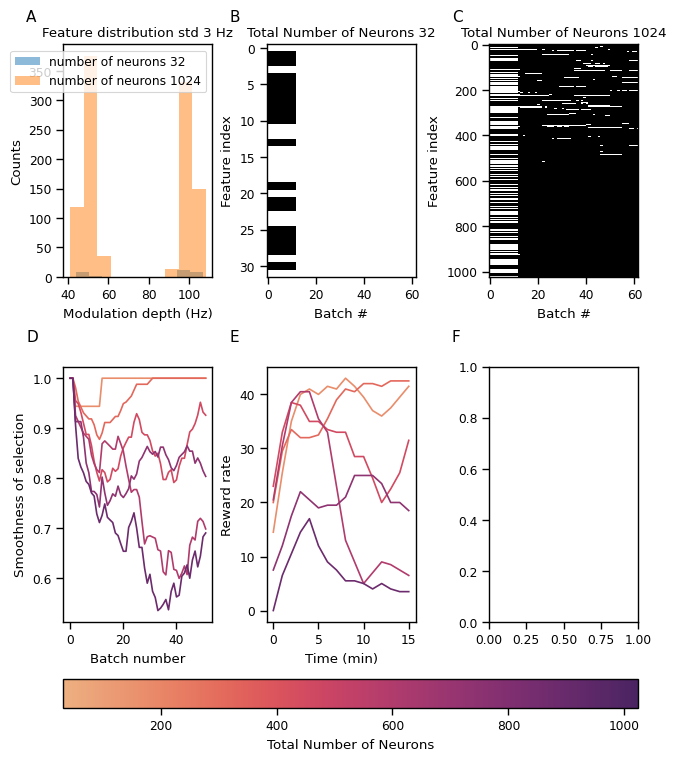

In [41]:
# we make a 4 by 4 figure

figure4, summary_axes = subplots_with_labels(2,3, figsize = (6.5, 7.5), gridspec_kw={'height_ratios': [1, 1.1]})
ax_weight = summary_axes[0,0]

exp_indices = [0, -1]

for exp_index in exp_indices:
    feature_weights = exp_data_all[exp_index]['feature_selection']['feature_weights']
    ax_weight.hist(feature_weights, label=f'number of neurons {total_number_of_neurons_array[exp_index]}', alpha=0.5)
    ax_weight.legend()
ax_weight.set_xlabel('Modulation depth (Hz)')
ax_weight.set_ylabel('Counts')
ax_weight.set_title(f'Feature distribution std {std} Hz')


active_set_to_plot_indices = [0, -1]

for i, a in enumerate(active_set_to_plot_indices):
    # the top 2 are the feature selection plots
    plot_feature_selection(exp_data_all[a]['feature_selection']['feat_set'], 
                        ax = summary_axes[0,i+1])

    summary_axes[0,i+1].set_title(f'Total Number of Neurons {total_number_of_neurons_array[a]}')
    summary_axes[0,i+1].set_xlabel("Batch #")

# plot the smoothness of the features
colors = sns.color_palette('flare', n_colors=len(exp_data_all))
norm = plt.Normalize(total_number_of_neurons_array.min(), total_number_of_neurons_array.max())
sm = plt.cm.ScalarMappable(cmap="flare", norm=norm)

s = sns.lineplot(data=smoothness_conds_by_batch_ma.T, 
            ax=summary_axes[1,0], legend = False, palette = colors, 
            dashes = False)
summary_axes[1,0].set_xlabel('Batch number')
summary_axes[1,0].set_ylabel('Smoothness of selection')


# plot the reward rate
sns.lineplot(data=reward_rate_all.T, 
            ax=summary_axes[1,1],
            legend = False, palette = colors, dashes = False)
summary_axes[1,1].set_ylabel('Reward rate')
summary_axes[1,1].set_xlabel('Time (min)')
cbar = figure4.colorbar(sm, ax=summary_axes[1,:],
                 orientation='horizontal',
                 location = "bottom")
cbar.set_label('Total Number of Neurons')
# figure4.tight_layout()

### save to gdrive

In [42]:
if save_to_gdrive:
    figure4.savefig(gdrive_directory + 'figure6_total_neuron_scan.pdf', dpi = dpi_value)
    figure4.savefig(gdrive_directory + 'figure6_total_neuron_scan.png', dpi = dpi_value)